In [1]:
!pip install datasets contractions pyspellchecker textBlob torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompati

In [2]:
import transformers
import torch
import torchvision
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
import os
import cv2
import nltk
nltk.download('wordnet')
import copy
from tqdm.notebook import tqdm
import re
import contractions
import textblob

# import SpellChecker

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [5]:
# Load model directly
from spellchecker import SpellChecker
from textblob import TextBlob, Word
from torchvision.transforms import ToTensor
from transformers import BertTokenizer, BertForSequenceClassification, BertModel
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torchvision.models import resnet50,resnet18
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.optim import Adam
from transformers import AutoTokenizer, TFBertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, multilabel_confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from datasets import load_dataset, Image
from datasets import Dataset, DatasetDict
from torch import nn
from PIL import Image
from PIL import ImageFile
Image.LOAD_TRUNCATED_IMAGES = True
ImageFile.LOAD_TRUNCATED_IMAGES = True
from transformers import BertTokenizer
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

cachedStopWords  = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
# !unzip "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive/last_project_dataset"

In [7]:

# !unzip "drive/MyDrive/archive.zip" -d "/content/drive/MyDrive/last_project_dataset"

In [8]:
df = pd.read_csv("/content/drive/MyDrive/last_project_dataset/labels.csv")

In [9]:
#read image data
# img_data_dir = "/content/drive/MyDrive/last_project_dataset/images/images"
# Get the list of all image files in the dataset
# image_files = [os.path.join(img_data_dir, file) for file in df['image_name']]

In [10]:
# def midpoint(x1, y1, x2, y2):
#     x_mid = int((x1 + x2)/2)
#     y_mid = int((y1 + y2)/2)
#     return (x_mid, y_mid)

# #Main function that detects text and inpaints.
# #Inputs are the image path and kreas_ocr pipeline
# def inpaint_text(img_path, pipeline):
#     # read the image
#     img = keras_ocr.tools.read(img_path)

#     # Recogize text (and corresponding regions)
#     # Each list of predictions in prediction_groups is a list of
#     # (word, box) tuples.
#     prediction_groups = pipeline.recognize([img])

#     #Define the mask for inpainting
#     mask = np.zeros(img.shape[:2], dtype="uint8")
#     for box in prediction_groups[0]:
#         x0, y0 = box[1][0]
#         x1, y1 = box[1][1]
#         x2, y2 = box[1][2]
#         x3, y3 = box[1][3]

#         x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
#         x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)

#         #For the line thickness, we will calculate the length of the line between
#         #the top-left corner and the bottom-left corner.
#         thickness = int(np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

#         #Define the line and inpaint
#         cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,
#         thickness)
#         inpainted_img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)

#     return(inpainted_img)

# # keras-ocr will automatically download pretrained
# # weights for the detector and recognizer.
# pipeline = keras_ocr.pipeline.Pipeline()

# img_data_dir = "/content/drive/MyDrive/last_project_dataset/images/images"

# for img_name in df['image_name']:
#   img_text_removed = inpaint_text(os.path.join(img_data_dir, img_name) , pipeline)

#   plt.imshow(img_text_removed)

#   cv2.imwrite(f'/content/drive/MyDrive/last_project_dataset/image_After_text_remove/{img_name}', cv2.cvtColor(img_text_removed, cv2.COLOR_BGR2RGB))

<Axes: xlabel='overall_sentiment', ylabel='count'>

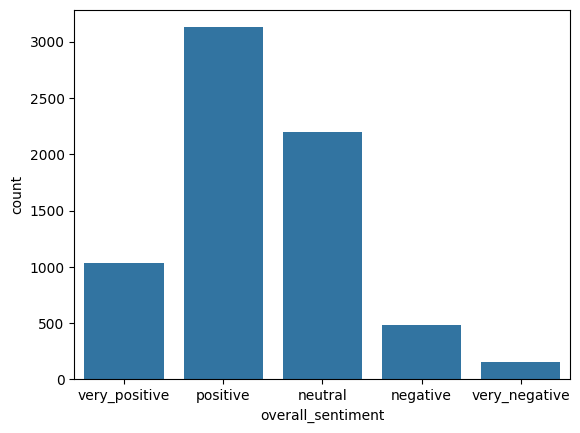

In [11]:
sns.countplot(df, x='overall_sentiment')

In [12]:
# Function to clean text
def clean_text(text):
    text = text.lower().strip()
    text = re.sub(r'(.)\1+', r'\1\1', text)
    text = re.sub(r'\b(?:https?://)?\S+\.(?:com|ir|org|edu|gov|net)\b', '', text)
    text = contractions.fix(text)
    text = re.sub(r'(@[A-Za-z0-9]+) | ([^0-9A-Za-z \t]) | (\w+:\/\/\S+)', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'#\w+', '', text)
    date_pattern = re.compile(r'\b(?:January|February|March|April|May|June|July|August|September|October|November|December|Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\s+\d{1,2}\b', re.IGNORECASE)
    text = re.sub(date_pattern,'',text)
    time_related_pattern = re.compile(r'\b(?:\d{1,2}:\d{1,2}(?: [APMapm]+)?|(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)|\d{1,2}/\d{1,2}(?:/\d{2,4})?|\d{4}|\b(?:Mon(?:day)?|Tue(?:sday)?|Wed(?:nesday)?|Thu(?:rsday)?|Fri(?:day)?|Sat(?:urday)?|Sun(?:day)?)\b)', re.IGNORECASE)
    text = re.sub(time_related_pattern, '', text)
    currency_pattern = re.compile(r'[£$€]\S+')
    text = re.sub(currency_pattern, '', text)
    text = re.sub(r'[^\w\s]','', text)
    lemmatizer = WordNetLemmatizer()
    text = pos_tagger(text)
    text = ' '.join([word for word in text if word not in cachedStopWords])
    return text

def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [13]:
positives = df[(df['overall_sentiment'] == 'positive') & pd.notna(df['text_corrected'])].sample(n=300)
very_positives = df[(df['overall_sentiment'] == 'very_positive') & pd.notna(df['text_corrected'])].sample(n=300)
neutral = df[(df['overall_sentiment'] == 'neutral') & pd.notna(df['text_corrected'])].sample(n=300)
negative = df[(df['overall_sentiment'] == 'negative') & pd.notna(df['text_corrected'])].sample(n=300)
very_negative = df[(df['overall_sentiment'] == 'very_negative') & pd.notna(df['text_corrected'])].sample(n=151)

In [14]:
positives['text_corrected'] = pd.DataFrame(positives['text_corrected'].apply(lambda x: clean_text(x)))
very_positives['text_corrected'] = pd.DataFrame(very_positives['text_corrected'].apply(lambda x: clean_text(x)))
neutral['text_corrected'] = pd.DataFrame(neutral['text_corrected'].apply(lambda x: clean_text(x)))
negative['text_corrected'] = pd.DataFrame(negative['text_corrected'].apply(lambda x: clean_text(x)))
very_negative['text_corrected'] = pd.DataFrame(very_negative['text_corrected'].apply(lambda x: clean_text(x)))

In [15]:
# df = shuffle(copy.deepcopy(pd.concat([positives, very_positives, neutral, negative, very_negative], axis=0))).reset_index(drop=True)

In [16]:
# Concatenate dataframes
concatenated_df = pd.concat([positives, very_positives, neutral, negative, very_negative], axis=0)

# Create a deep copy of the concatenated dataframe
copied_df = copy.deepcopy(concatenated_df)

# Shuffle the copied dataframe
shuffled_df = shuffle(copied_df)

# Reset the index of the shuffled dataframe
df = shuffled_df.reset_index(drop=True)

In [17]:
dropped_index = df[df['text_corrected'].isnull()].index.tolist()
print(dropped_index)

[]


In [18]:
labels = pd.DataFrame(df['overall_sentiment'])
data = pd.DataFrame(df.drop(columns=["Unnamed: 0", "text_ocr", "overall_sentiment"]))

In [19]:
data.head()

,image_name,text_corrected
0,image_6085.png,long star window
1,image_1067.jpg,laser destroy america meme lead americas demise
2,image_361.png,bill bill rich bill smart follow dream like bill
3,image_2054.jpg,hitler second coming christ certainly would ex...
4,image_4463.jpeg,song come friendss_


In [20]:
# data['text_corrected'][6786] = copy.deepcopy(data['text_corrected'][86])
# data['text_corrected'][6784] = copy.deepcopy(data['text_corrected'][1969])
# data['text_corrected'][6781] = copy.deepcopy(data['text_corrected'][5138])
# data['text_corrected'][4799] = copy.deepcopy(data['text_corrected'][5478])
# data['text_corrected'][119] = copy.deepcopy(data['text_corrected'][5555])


In [21]:
# Label Encoding
label_encoder = LabelEncoder()
en_labels = label_encoder.fit_transform(labels)
labels = pd.DataFrame(en_labels)

In [22]:
label_counts = labels.value_counts()
print(label_counts)

0    300
1    300
2    300
4    300
3    151
dtype: int64


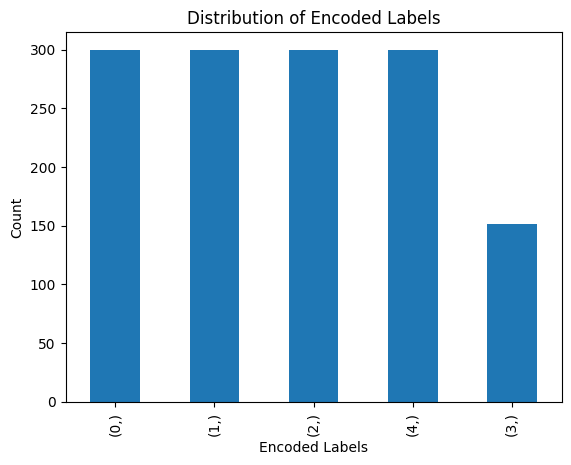

In [23]:
label_counts = labels.value_counts()

# Plotting the bar chart
label_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.title('Distribution of Encoded Labels')

# Show the plot
plt.show()

In [24]:
X, X_test, Y, y_test = train_test_split(data, labels, test_size=0.05, random_state=124)

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=124)

print(f"X_train_size: {len(X_train)} , y_train_size: {len(y_train)}")
print(f"X_test_size: {len(X_test)} , y_test_size: {len(y_test)}")
print(f"X_val_size: {len(X_val)} , y_val_size: {len(y_val)}")

X_train_size: 1026 , y_train_size: 1026
X_test_size: 68 , y_test_size: 68
X_val_size: 257 , y_val_size: 257


In [25]:
num_clients=3

In [26]:
def split_federated_data(X, y, num_clients=3, client_fraction=0.8, random_state=None):
    if not 1 <= num_clients <= len(X):
        raise ValueError("Invalid number of clients")

    if not 0 < client_fraction <= 1:
        raise ValueError("Invalid client fraction")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-client_fraction, random_state=random_state, shuffle=True)

    # Split the training set into subsets for each client
    client_data = []
    for i in range(num_clients):
        start_idx = int(i * client_fraction * len(X_train) / num_clients)
        end_idx = int((i + 1) * client_fraction * len(X_train) / num_clients)
        X_client = X_train.iloc[start_idx:end_idx]
        y_client = y_train.iloc[start_idx:end_idx]
        client_data.append([X_client, y_client])

    # Add the remaining data to the last client
    X_client = X_train.iloc[end_idx:]
    y_client = y_train.iloc[end_idx:]
    client_data[-1] = [X_client, y_client]
    return client_data

client_data = split_federated_data(X_train, y_train, num_clients=num_clients, client_fraction=0.8, random_state=42)
client_validation = split_federated_data(X_val, y_val, num_clients=num_clients, client_fraction=0.8, random_state=42)

In [27]:
# Specify the file path and name
# folder_path = '/content/drive/MyDrive/last_project_dataset/pre_processed'
# file_name = 'val_data.csv'
# file_path = os.path.join(folder_path, file_name)

# # Save DataFrame to CSV
# pd.concat([X_val, y_val], axis=1).to_csv(file_path, index=False)


In [28]:
def concat_data_by_label(client_data, num_clients=5):
  concated = [pd.concat([client_data[i][0],client_data[i][1]], axis=1).rename(columns={0:'label'}) for i in range(num_clients)]
  return concated
concated_data_train = concat_data_by_label(client_data, num_clients)
concated_data_val = concat_data_by_label(client_validation, num_clients)

In [29]:
concated_test = pd.concat([X_test, y_test], axis=1).rename(columns={0:'label'})

In [30]:
type(pd.DataFrame(concated_data_train))

pandas.core.frame.DataFrame

In [31]:
def to_dataset(data, num_clients=5):
  train_data = [Dataset.from_pandas(pd.DataFrame(data[i]))for i in range(num_clients)]
  return train_data

train_dataset = to_dataset(concated_data_train, num_clients)
val_dataset = to_dataset(concated_data_val, num_clients)


In [32]:
# train_data = Dataset.from_pandas([dataset[i] for i in range(num_clients)])
test_data = Dataset.from_pandas(concated_test)

In [33]:
#loading bert tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [34]:
encoded_train = [train_dataset[i].map(lambda data: tokenizer(data['text_corrected'], max_length=256, padding="max_length",
                                                             return_tensors='pt', truncation=True),
                                       batched=True) for i in range(num_clients)]

encoded_val = [val_dataset[i].map(lambda data: tokenizer(data['text_corrected'], max_length=256, padding="max_length",
                                                         return_tensors='pt', truncation=True),
                                       batched=True) for i in range(num_clients)]

encoded_test = test_data.map(lambda data: tokenizer(data['text_corrected'], max_length=256, padding="max_length",
                                                    return_tensors='pt', truncation=True), batched=True)

Map:   0%|          | 0/218 [00:00<?, ? examples/s]

Map:   0%|          | 0/219 [00:00<?, ? examples/s]

Map:   0%|          | 0/164 [00:00<?, ? examples/s]

Map:   0%|          | 0/54 [00:00<?, ? examples/s]

Map:   0%|          | 0/55 [00:00<?, ? examples/s]

Map:   0%|          | 0/41 [00:00<?, ? examples/s]

Map:   0%|          | 0/68 [00:00<?, ? examples/s]

In [35]:
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader, RandomSampler

In [36]:
transforms = v2.Compose([
    v2.ToImage(),
    v2.ToTensor(),
    v2.ToDtype(torch.uint8, scale=True),
    v2.Resize(size=(224, 224), antialias=True),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=transforms):
        self.dataframe = dataframe
        self.image_dir = '/content/drive/MyDrive/last_project_dataset/images/images'
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.dataframe['image_name'].iloc[idx])
        image = Image.open(img_name).convert('RGB')

        text_data = {
            'input_ids': torch.tensor(self.dataframe['input_ids'].iloc[idx], dtype=torch.int64),
            # 'token_type_ids': torch.tensor(self.dataframe['token_type_ids'].iloc[idx], dtype=torch.int64),
            'attention_mask': torch.tensor(self.dataframe['attention_mask'].iloc[idx], dtype=torch.int64),
        }
        label = torch.tensor(self.dataframe['label'].iloc[idx], dtype=torch.int64)
        if self.transform:
            image = self.transform(image)
        return {'image': image, 'text': text_data, 'label': label}

# custom_dataset = CustomDataset(pd.DataFrame.from_dict(encoded_train[0]), transforms)
# data_loader = DataLoader(custom_dataset, shuffle=True, batch_size=8)

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertForSequenceClassification
from transformers import AutoModel, AutoTokenizer

class MultiModalModel(nn.Module):
    def __init__(self, num_classes):
        super(MultiModalModel, self).__init__()

        self.resnet = resnet18(pretrained=True)
        # self.resnet = torchvision.models.resnet101(pretrained=True)
        self.image_branch = nn.Sequential(
            *list(self.resnet.children())[:-2],
        )

        num_layers_to_unfreeze = 50
        start_layer_index = len(list(self.image_branch.children())) - num_layers_to_unfreeze

        for layer_index, param in enumerate(self.image_branch.parameters()):
            # if layer_index >= start_layer_index:
            param.requires_grad = True
            # else:
            #   param.requires_grad = False

        # Text branch
        self.bert_model = BertModel.from_pretrained("bert-base-uncased")

        total_layers = len(list(self.bert_model.children()))

        # Specify the number of layers you want to unfreeze from the end
        num_layers_to_unfreeze = 50
        # Calculate the starting index of the layers to unfreeze
        start_layer_index = total_layers - num_layers_to_unfreeze
        for layer_index, param in enumerate(self.bert_model.parameters()):
            # if layer_index >= start_layer_index:
            param.requires_grad = True
            # else:
            #   param.requires_grad = False

        # Fusion layer
        neu = 115

        self.fusion_layer = nn.Linear(512 + self.bert_model.config.hidden_size, neu)  # Adjust input size based on your needs

        self.hidden1 = nn.Linear(neu, neu)
        self.hidden2 = nn.Linear(neu, neu)
        self.hidden3 = nn.Linear(neu, neu)
        self.hidden4 = nn.Linear(neu, neu)
        self.hidden5 = nn.Linear(neu, neu)
        self.hidden6 = nn.Linear(neu, neu)
        self.hidden7 = nn.Linear(neu, neu)

        self.hidden8 = nn.Linear(neu, neu)
        self.hidden9 = nn.Linear(neu, neu)
        self.hidden10 = nn.Linear(neu, neu)

        self.dropout = nn.Dropout(p=0.8)
        # Output layer
        self.output_layer = nn.Linear(neu, num_classes)

    def forward(self, image_input, input_ids, attention_mask, token_type_ids=0):
        # Image branch (ResNet)
        image_features = self.image_branch(image_input)
        image_features = F.adaptive_avg_pool2d(image_features, (1, 1))
        image_features = image_features.view(image_features.size(0), -1)

        # Text branch (BERT)

        _, pooled_output = self.bert_model(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)

        # Concatenate features from both branches
        fused_features = torch.cat((image_features, pooled_output), dim=1)
        # # Fusion layer
        fused_features = F.relu(self.fusion_layer(fused_features))
        fused_features = self.dropout(fused_features)

        # #add hidden layer
        hidden1 = F.relu(self.hidden1(fused_features))
        hidden1 = self.dropout(hidden1)

        hidden2 = F.relu(self.hidden2(hidden1))
        hidden2 = self.dropout(hidden2)

        hidden3 = F.relu(self.hidden3(hidden2))
        hidden3 = self.dropout(hidden3)

        output = self.output_layer(hidden3)
        return output

# Example usage:
num_classes = 5
model = MultiModalModel(num_classes)

In [74]:
class Client():
  def __init__(self, client_id, train_data, val_data, model, weights, epochs, optimizer, loss_func, scheduler=None, batch_size=5):
    self.client_name = "client_" + str(client_id)
    self.train_sampler = self.sampler(train_data)
    self.val_sampler = self.sampler(val_data)

    self.train_data = DataLoader(CustomDataset(pd.DataFrame.from_dict(train_data), transforms), shuffle=False, batch_size=batch_size, sampler=self.train_sampler)
    self.val_data = DataLoader(CustomDataset(pd.DataFrame.from_dict(val_data), transforms), shuffle=False, batch_size=batch_size, sampler=self.val_sampler)

    self.model = model
    self.epochs = epochs
    self.optimizer = optimizer
    self.scheduler = scheduler
    self.loss_func = loss_func
    self.weights = weights
  def sampler(self , data):
    labels = data['label']
    class_weights = 1.0 / torch.bincount(torch.tensor(data['label']))
    # Create a weight for each sample
    weights = class_weights[labels]
    return WeightedRandomSampler(weights, len(weights))

  def validation(self, valid_data):
    val_loss = []
    val_f1_score = []

    all_labels = []
    all_predictions = []

    total_val_loss = 0
    for idx, batch in enumerate(valid_data):
      img = batch['image'].to(device)

      input_ids = batch['text']['input_ids'].to(device)
      attention_mask = batch['text']['attention_mask'].to(device)
      # token_type_ids = batch['text']['token_type_ids'].to(device)
      lbls = batch['label'].to(device)

      valid_output = self.model(img, input_ids, attention_mask)
      y_pred = torch.argmax(valid_output,dim=1).cpu()

      all_labels.append(lbls)
      all_predictions.append(y_pred)

      vloss = self.loss_func(valid_output, lbls)

      total_val_loss += vloss

    all_labels = torch.cat(all_labels).cpu().numpy()
    all_predictions = torch.cat(all_predictions).cpu().numpy()

    f1_score_value = f1_score(all_labels, all_predictions, average='macro')
    val_precision_value = precision_score(all_labels, all_predictions, average='macro')
    val_recall_value = recall_score(all_labels, all_predictions, average='macro')
    val_balanced_accuracy_score_value = accuracy_score(all_labels, all_predictions)

    avg_val_loss = total_val_loss / len(valid_data) * 100
    avg_f1_score = torch.mean(torch.tensor(f1_score_value)) * 100
    avg_precision = torch.mean(torch.tensor(val_precision_value)) * 100
    avg_recall = torch.mean(torch.tensor(val_recall_value)) * 100
    avg_acc = torch.mean(torch.tensor(val_balanced_accuracy_score_value)) * 100


    return avg_val_loss, avg_f1_score, avg_precision, avg_recall, avg_acc

  def train(self):

    self.model.load_state_dict(self.weights)
    if torch.cuda.is_available():
      self.model = self.model.cuda()
      self.loss_func = self.loss_func.cuda()

    train_loss = []
    train_acc = []
    train_f1 = []

    val_loss = []
    val_acc = []
    val_f1 = []
    val_f1_score = []
    val_precision = []
    val_recall = []
    for epoch_i in range(0, self.epochs):
    # ========================================
    #               Training
    # ========================================
      print(f'======== Epoch {epoch_i + 1} / {self.epochs} ========')
      print(f"Client ID : {self.client_name}")
      print('Training...')

      all_labels = []
      all_predictions = []

      epoch_train_loss = []
      epoch_train_acc = []
      train_f1_score = []
      train_precision = []
      train_recall = []

      total_train_loss = 0

      self.model.train(True)

      for step, batch in tqdm(enumerate(self.train_data)):

          image = batch['image'].to(device)
          input_ids = batch['text']['input_ids'].to(device)
          attention_mask = batch['text']['attention_mask'].to(device)

          lbl = batch['label'].to(device)

          result = self.model(image, input_ids, attention_mask)


          y_pred = torch.argmax(result, dim=1).cpu()

          all_labels.append(lbl)
          all_predictions.append(y_pred)


          loss = self.loss_func(result, lbl)
          total_train_loss += loss.item()


          # Perform a backward pass to calculate the gradients.
          self.model.zero_grad()
          loss.backward()
          # Clip the norm of the gradients to 1.0.
          # This is to help prevent the "exploding gradients" problem.
          torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
          self.optimizer.step()

      if self.scheduler:
        self.scheduler.step()
      epoch_train_loss.append(total_train_loss / len(self.train_data))

      all_labels = torch.cat(all_labels).cpu().numpy()
      all_predictions = torch.cat(all_predictions).cpu().numpy()

      train_f1_score_value = f1_score(all_labels, all_predictions, average='macro')
      train_precision_value = precision_score(all_labels, all_predictions, average='macro')
      train_recall_value = recall_score(all_labels, all_predictions, average='macro')

      train_balanced_accuracy_score_value = accuracy_score(all_labels, all_predictions)

      train_loss_avg = torch.mean(torch.tensor(epoch_train_loss)) * 100
      train_f1_avg = torch.mean(torch.tensor(train_f1_score_value)) * 100
      train_acc_avg = torch.mean(torch.tensor(train_balanced_accuracy_score_value)) * 100
      train_precision_avg = torch.mean(torch.tensor(train_precision_value)) * 100
      train_recall_avg = torch.mean(torch.tensor(train_recall_value)) * 100

      train_loss.append(train_loss_avg)
      train_f1.append(train_f1_avg)
      train_acc.append(train_acc_avg)
      train_precision.append(train_precision_avg)
      train_recall.append(train_recall_avg)

      print(f"Average training f1_score: {train_f1_avg :.3f}")
      print(f"Average training accuracy: {train_acc_avg :.3f}")
      print(f"Average training precision: {train_precision_avg :.3f}")
      print(f"Average training recall: {train_recall_avg :.3f}")
      print(f"Average training loss: {train_loss_avg :.3f}")

      with torch.no_grad():
        print("________validation metrics__________")
        val_avg_loss, val_avg_f1_score, val_avg_precision, val_avg_recall, val_avg_acc = self.validation(self.val_data)
        val_loss.append(val_avg_loss)
        val_acc.append(val_avg_acc)
        val_f1_score.append(val_avg_f1_score)
        val_precision.append(val_avg_precision)
        val_recall.append(val_avg_recall)

        print(f"Average validation f1_Score: {val_avg_f1_score :.3f}")
        print(f"Average validation accuracy: {val_avg_acc :.3f}")
        print(f"Average validation precision: {val_avg_precision :.3f}")
        print(f"Average validation recall: {val_avg_recall :.3f}")
        print(f"Average validation loss: {val_avg_loss :.3f}")

        if val_avg_acc >= 50.0:
          break

    #set new weights
    weights = self.model.state_dict()
    return {'client_name': self.client_name,
            'weights': weights,
            'train_loss': train_loss,
            'train_f1_scores': train_f1,
            'train_balanced_accuracy': train_acc,
            'train_precision': train_precision,
            'train_recall': train_recall,

            'val_loss': val_loss,
            'val_f1_score': val_f1_score,
            'val_balanced_accuracy': val_acc,
            'val_precision': val_precision,
            'val_recall': val_recall
            }


In [75]:
class Server():
  def __init__(self, train_data, val_data, test_data, model, rounds, epochs, optimizer, loss_func, scheduler=None, clients_number=5, batch_size=5):
    self.train_data = train_data
    self.val_data = val_data
    self.batch_size = batch_size
    self.test_data = DataLoader(CustomDataset(pd.DataFrame.from_dict(test_data), transforms), shuffle=False, batch_size=self.batch_size)
    self.model = model
    self.rounds = rounds
    self.epochs = epochs
    self.optimizer = optimizer
    self.scheduler = scheduler
    self.loss_func = loss_func
    self.clients_number = clients_number

  def fed_avg(self, weights):
    fed_avg_weights = copy.deepcopy(weights[0])

    for w_k in self.server_weight.keys():
      for i in range(1, len(weights)):
        fed_avg_weights[w_k] += weights[i][w_k]
      fed_avg_weights[w_k] = torch.div(fed_avg_weights[w_k], len(weights))
    return fed_avg_weights

  def train(self):
    original_model_weights = self.model.state_dict()

    clients_data = []
    clients_train_loss = {}
    client_train_acc = {}
    client_train_f1 = {}

    clients_val_loss = {}
    client_val_acc = {}
    client_val_f1 = {}
    client_val_precision = {}
    client_val_recal = {}

    for round in range(0, self.rounds):

      #load weights
      self.server_weight = self.model.state_dict()

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.
      clients_weights = []

      for i in range(self.clients_number):
        print(f"Round: {round + 1} / {self.rounds}")
        client = Client(client_id=i + 1, train_data=self.train_data[i], val_data=self.val_data[i],
                        model=self.model, weights=self.server_weight, epochs=self.epochs, optimizer=self.optimizer,
                        loss_func=self.loss_func, scheduler=self.scheduler, batch_size=self.batch_size).train()

        clients_train_loss.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['train_loss']))
        client_train_acc.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['train_balanced_accuracy']))
        client_train_f1.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['train_f1_scores']))

        clients_val_loss.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['val_loss']))
        client_val_acc.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['val_balanced_accuracy']))
        client_val_f1.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['val_f1_score']))
        client_val_precision.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['val_precision']))
        client_val_recal.setdefault(f"{client['client_name']}", []).append(copy.deepcopy(client['val_recall']))


        clients_weights.append(copy.deepcopy(client['weights']))
        clients_data.append(client)

      original_model_weights = self.fed_avg(clients_weights)
      self.model.load_state_dict(original_model_weights)

    return clients_train_loss, client_train_acc, client_train_f1, clients_val_loss, client_val_acc, client_val_f1, client_val_precision, client_val_recal

  def test(self):

    test_loss = []
    test_f1_score = []

    all_labels = []
    all_predictions = []
    with torch.no_grad():

      for idx, batch in enumerate(self.test_data):
        img = batch['image'].to(device)
        input_ids = batch['text']['input_ids'].to(device)
        attention_mask = batch['text']['attention_mask'].to(device)
        # token_type_ids = batch['text']['token_type_ids'].to(device)
        lbls = batch['label'].to(device)

        valid_output = self.model(img, input_ids, attention_mask)

        y_pred = torch.argmax(valid_output, dim=1).cpu()

        all_labels.append(lbls)
        all_predictions.append(y_pred)


      all_labels = torch.cat(all_labels).cpu().numpy()
      all_predictions = torch.cat(all_predictions).cpu().numpy()

      f1_score_value = f1_score(all_labels, all_predictions, average='macro')
      precision_value = precision_score(all_labels, all_predictions, average='macro')
      recall_value = recall_score(all_labels, all_predictions, average='macro')
      balanced_accuracy_score_value = accuracy_score(all_labels, all_predictions)
      multilabel_confusion_matrix_ = multilabel_confusion_matrix(all_labels, all_predictions, labels=[0,1,2,3,4])
      print(f"Test F1_score: {f1_score_value * 100}")
      print(f"Test Precision Value: {precision_value * 100}")
      print(f"Test Recall Value: {recall_value * 100}")
      print(f"Test Accuracy: {balanced_accuracy_score_value * 100}")
      print(f"Test Confusion Matrix: {multilabel_confusion_matrix_}")

      return multilabel_confusion_matrix_


In [76]:
from torch.optim.lr_scheduler import ExponentialLR

optimizer = Adam(model.parameters(),
                  lr = 5e-6, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8, # args.adam_epsilon  - default is 1e-8.
                  weight_decay=1e-5
                )

# scheduler=None
scheduler = ExponentialLR(optimizer, gamma=0.9)

loss_fn = nn.CrossEntropyLoss()
rounds = 3
epochs = 10
batch_size = 18

server = Server(train_data=encoded_train, val_data=encoded_val, test_data=encoded_test, model=model,
                rounds=rounds, epochs=epochs,optimizer=optimizer, scheduler=scheduler, loss_func=loss_fn,
                clients_number=num_clients, batch_size=batch_size)
train_res = server.train()

Round: 1 / 3
======== Epoch 1 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.339
Average training accuracy: 17.431
Average training precision: 17.802
Average training recall: 17.576
Average training loss: 166.130
________validation metrics__________
Average validation f1_Score: 17.774
Average validation accuracy: 20.370
Average validation precision: 19.653
Average validation recall: 18.583
Average validation loss: 163.455
======== Epoch 2 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.121
Average training accuracy: 22.477
Average training precision: 22.935
Average training recall: 22.823
Average training loss: 166.090
________validation metrics__________
Average validation f1_Score: 19.230
Average validation accuracy: 20.370
Average validation precision: 20.233
Average validation recall: 21.713
Average validation loss: 167.187
======== Epoch 3 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.473
Average training accuracy: 18.807
Average training precision: 20.762
Average training recall: 20.050
Average training loss: 167.778
________validation metrics__________
Average validation f1_Score: 17.773
Average validation accuracy: 20.370
Average validation precision: 18.909
Average validation recall: 21.158
Average validation loss: 164.105
======== Epoch 4 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.418
Average training accuracy: 21.560
Average training precision: 22.095
Average training recall: 21.427
Average training loss: 167.311
________validation metrics__________
Average validation f1_Score: 20.778
Average validation accuracy: 22.222
Average validation precision: 23.788
Average validation recall: 21.877
Average validation loss: 161.979
======== Epoch 5 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.521
Average training accuracy: 26.147
Average training precision: 24.175
Average training recall: 23.857
Average training loss: 160.763
________validation metrics__________
Average validation f1_Score: 16.770
Average validation accuracy: 16.667
Average validation precision: 17.953
Average validation recall: 19.222
Average validation loss: 162.250
======== Epoch 6 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.615
Average training accuracy: 19.725
Average training precision: 18.999
Average training recall: 19.718
Average training loss: 165.119
________validation metrics__________
Average validation f1_Score: 18.388
Average validation accuracy: 18.519
Average validation precision: 19.357
Average validation recall: 18.611
Average validation loss: 167.431
======== Epoch 7 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.504
Average training accuracy: 22.477
Average training precision: 20.295
Average training recall: 22.275
Average training loss: 162.008
________validation metrics__________
Average validation f1_Score: 14.446
Average validation accuracy: 14.815
Average validation precision: 14.509
Average validation recall: 14.532
Average validation loss: 166.486
======== Epoch 8 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.985
Average training accuracy: 18.349
Average training precision: 18.333
Average training recall: 18.734
Average training loss: 162.364
________validation metrics__________
Average validation f1_Score: 20.055
Average validation accuracy: 20.370
Average validation precision: 22.437
Average validation recall: 22.899
Average validation loss: 163.250
======== Epoch 9 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 24.455
Average training accuracy: 24.312
Average training precision: 27.437
Average training recall: 23.972
Average training loss: 162.388
________validation metrics__________
Average validation f1_Score: 17.674
Average validation accuracy: 22.222
Average validation precision: 19.380
Average validation recall: 25.217
Average validation loss: 168.438
======== Epoch 10 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.527
Average training accuracy: 22.477
Average training precision: 22.647
Average training recall: 22.799
Average training loss: 161.921
________validation metrics__________
Average validation f1_Score: 18.514
Average validation accuracy: 20.370
Average validation precision: 20.952
Average validation recall: 19.365
Average validation loss: 163.333
Round: 1 / 3
======== Epoch 1 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.326
Average training accuracy: 17.808
Average training precision: 18.137
Average training recall: 18.239
Average training loss: 166.394
________validation metrics__________
Average validation f1_Score: 22.126
Average validation accuracy: 21.818
Average validation precision: 24.505
Average validation recall: 22.605
Average validation loss: 167.547
======== Epoch 2 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.430
Average training accuracy: 17.808
Average training precision: 17.852
Average training recall: 18.687
Average training loss: 164.470
________validation metrics__________
Average validation f1_Score: 14.336
Average validation accuracy: 18.182
Average validation precision: 15.381
Average validation recall: 14.603
Average validation loss: 163.413
======== Epoch 3 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.763
Average training accuracy: 19.635
Average training precision: 18.938
Average training recall: 19.202
Average training loss: 164.206
________validation metrics__________
Average validation f1_Score: 21.973
Average validation accuracy: 23.636
Average validation precision: 22.838
Average validation recall: 25.192
Average validation loss: 154.393
======== Epoch 4 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.156
Average training accuracy: 21.005
Average training precision: 20.945
Average training recall: 21.220
Average training loss: 170.110
________validation metrics__________
Average validation f1_Score: 15.664
Average validation accuracy: 16.364
Average validation precision: 14.470
Average validation recall: 17.636
Average validation loss: 159.120
======== Epoch 5 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.610
Average training accuracy: 20.548
Average training precision: 21.998
Average training recall: 20.623
Average training loss: 162.510
________validation metrics__________
Average validation f1_Score: 14.853
Average validation accuracy: 16.364
Average validation precision: 16.744
Average validation recall: 14.939
Average validation loss: 156.424
======== Epoch 6 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.675
Average training accuracy: 19.635
Average training precision: 21.001
Average training recall: 19.397
Average training loss: 161.354
________validation metrics__________
Average validation f1_Score: 19.048
Average validation accuracy: 20.000
Average validation precision: 20.595
Average validation recall: 20.344
Average validation loss: 163.716
======== Epoch 7 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.360
Average training accuracy: 18.721
Average training precision: 17.757
Average training recall: 18.152
Average training loss: 164.452
________validation metrics__________
Average validation f1_Score: 13.036
Average validation accuracy: 14.545
Average validation precision: 15.524
Average validation recall: 15.044
Average validation loss: 176.154
======== Epoch 8 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.565
Average training accuracy: 24.658
Average training precision: 25.797
Average training recall: 24.042
Average training loss: 163.730
________validation metrics__________
Average validation f1_Score: 14.499
Average validation accuracy: 14.545
Average validation precision: 14.449
Average validation recall: 15.343
Average validation loss: 164.271
======== Epoch 9 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.670
Average training accuracy: 21.005
Average training precision: 19.565
Average training recall: 20.735
Average training loss: 165.011
________validation metrics__________
Average validation f1_Score: 15.589
Average validation accuracy: 16.364
Average validation precision: 17.990
Average validation recall: 19.076
Average validation loss: 169.810
======== Epoch 10 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.855
Average training accuracy: 17.808
Average training precision: 18.585
Average training recall: 18.348
Average training loss: 161.389
________validation metrics__________
Average validation f1_Score: 15.901
Average validation accuracy: 16.364
Average validation precision: 22.302
Average validation recall: 18.856
Average validation loss: 163.430
Round: 1 / 3
======== Epoch 1 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 14.913
Average training accuracy: 14.634
Average training precision: 16.268
Average training recall: 15.545
Average training loss: 167.367
________validation metrics__________
Average validation f1_Score: 12.287
Average validation accuracy: 12.195
Average validation precision: 10.791
Average validation recall: 17.778
Average validation loss: 164.416
======== Epoch 2 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 24.094
Average training accuracy: 25.000
Average training precision: 24.804
Average training recall: 23.816
Average training loss: 162.173
________validation metrics__________
Average validation f1_Score: 14.815
Average validation accuracy: 14.634
Average validation precision: 17.110
Average validation recall: 15.132
Average validation loss: 160.614
======== Epoch 3 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.093
Average training accuracy: 22.561
Average training precision: 24.482
Average training recall: 24.455
Average training loss: 161.793
________validation metrics__________
Average validation f1_Score: 14.636
Average validation accuracy: 17.073
Average validation precision: 14.652
Average validation recall: 16.142
Average validation loss: 170.290
======== Epoch 4 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.082
Average training accuracy: 20.122
Average training precision: 19.787
Average training recall: 19.887
Average training loss: 161.520
________validation metrics__________
Average validation f1_Score: 17.037
Average validation accuracy: 19.512
Average validation precision: 21.667
Average validation recall: 19.273
Average validation loss: 171.313
======== Epoch 5 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.255
Average training accuracy: 21.951
Average training precision: 23.586
Average training recall: 22.417
Average training loss: 166.553
________validation metrics__________
Average validation f1_Score: 14.257
Average validation accuracy: 14.634
Average validation precision: 16.732
Average validation recall: 14.944
Average validation loss: 165.008
======== Epoch 6 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.795
Average training accuracy: 17.683
Average training precision: 19.774
Average training recall: 17.820
Average training loss: 160.660
________validation metrics__________
Average validation f1_Score: 25.182
Average validation accuracy: 24.390
Average validation precision: 25.111
Average validation recall: 26.569
Average validation loss: 166.749
======== Epoch 7 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.085
Average training accuracy: 23.171
Average training precision: 26.842
Average training recall: 22.922
Average training loss: 161.662
________validation metrics__________
Average validation f1_Score: 26.074
Average validation accuracy: 26.829
Average validation precision: 25.446
Average validation recall: 31.692
Average validation loss: 172.348
======== Epoch 8 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.438
Average training accuracy: 17.073
Average training precision: 16.796
Average training recall: 18.213
Average training loss: 163.585
________validation metrics__________
Average validation f1_Score: 13.588
Average validation accuracy: 14.634
Average validation precision: 14.524
Average validation recall: 14.773
Average validation loss: 165.297
======== Epoch 9 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.899
Average training accuracy: 25.000
Average training precision: 23.962
Average training recall: 23.114
Average training loss: 159.776
________validation metrics__________
Average validation f1_Score: 20.630
Average validation accuracy: 21.951
Average validation precision: 18.788
Average validation recall: 25.516
Average validation loss: 164.571
======== Epoch 10 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.984
Average training accuracy: 23.171
Average training precision: 21.495
Average training recall: 22.175
Average training loss: 160.232
________validation metrics__________
Average validation f1_Score: 15.357
Average validation accuracy: 17.073
Average validation precision: 17.106
Average validation recall: 14.011
Average validation loss: 168.710
Round: 2 / 3
======== Epoch 1 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.113
Average training accuracy: 18.807
Average training precision: 17.563
Average training recall: 19.702
Average training loss: 168.495
________validation metrics__________
Average validation f1_Score: 18.484
Average validation accuracy: 18.519
Average validation precision: 20.671
Average validation recall: 18.200
Average validation loss: 167.435
======== Epoch 2 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.132
Average training accuracy: 22.936
Average training precision: 22.207
Average training recall: 23.184
Average training loss: 166.042
________validation metrics__________
Average validation f1_Score: 15.548
Average validation accuracy: 16.667
Average validation precision: 16.845
Average validation recall: 16.944
Average validation loss: 173.936
======== Epoch 3 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.978
Average training accuracy: 22.018
Average training precision: 21.572
Average training recall: 21.228
Average training loss: 163.883
________validation metrics__________
Average validation f1_Score: 16.300
Average validation accuracy: 18.519
Average validation precision: 18.667
Average validation recall: 15.746
Average validation loss: 168.047
======== Epoch 4 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.959
Average training accuracy: 20.183
Average training precision: 20.820
Average training recall: 19.998
Average training loss: 167.491
________validation metrics__________
Average validation f1_Score: 19.071
Average validation accuracy: 20.370
Average validation precision: 22.125
Average validation recall: 19.000
Average validation loss: 169.151
======== Epoch 5 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.067
Average training accuracy: 18.807
Average training precision: 18.193
Average training recall: 19.219
Average training loss: 160.979
________validation metrics__________
Average validation f1_Score: 23.545
Average validation accuracy: 22.222
Average validation precision: 33.854
Average validation recall: 21.955
Average validation loss: 172.913
======== Epoch 6 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.871
Average training accuracy: 23.853
Average training precision: 24.085
Average training recall: 25.040
Average training loss: 165.996
________validation metrics__________
Average validation f1_Score: 25.823
Average validation accuracy: 25.926
Average validation precision: 25.667
Average validation recall: 27.254
Average validation loss: 159.549
======== Epoch 7 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 15.193
Average training accuracy: 15.596
Average training precision: 16.511
Average training recall: 16.085
Average training loss: 167.560
________validation metrics__________
Average validation f1_Score: 9.267
Average validation accuracy: 11.111
Average validation precision: 11.639
Average validation recall: 9.048
Average validation loss: 169.953
======== Epoch 8 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.112
Average training accuracy: 18.807
Average training precision: 18.599
Average training recall: 18.494
Average training loss: 165.255
________validation metrics__________
Average validation f1_Score: 13.835
Average validation accuracy: 14.815
Average validation precision: 15.357
Average validation recall: 13.968
Average validation loss: 170.134
======== Epoch 9 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 14.041
Average training accuracy: 14.220
Average training precision: 14.550
Average training recall: 14.465
Average training loss: 172.200
________validation metrics__________
Average validation f1_Score: 14.898
Average validation accuracy: 16.667
Average validation precision: 16.381
Average validation recall: 15.824
Average validation loss: 168.820
======== Epoch 10 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.810
Average training accuracy: 22.936
Average training precision: 24.308
Average training recall: 23.437
Average training loss: 167.112
________validation metrics__________
Average validation f1_Score: 25.861
Average validation accuracy: 25.926
Average validation precision: 31.373
Average validation recall: 24.224
Average validation loss: 164.679
Round: 2 / 3
======== Epoch 1 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.038
Average training accuracy: 18.721
Average training precision: 18.361
Average training recall: 18.470
Average training loss: 166.331
________validation metrics__________
Average validation f1_Score: 25.342
Average validation accuracy: 25.455
Average validation precision: 28.476
Average validation recall: 25.159
Average validation loss: 159.970
======== Epoch 2 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.425
Average training accuracy: 16.895
Average training precision: 17.799
Average training recall: 16.908
Average training loss: 166.934
________validation metrics__________
Average validation f1_Score: 17.716
Average validation accuracy: 18.182
Average validation precision: 23.399
Average validation recall: 19.163
Average validation loss: 155.997
======== Epoch 3 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.844
Average training accuracy: 23.744
Average training precision: 23.027
Average training recall: 22.979
Average training loss: 170.338
________validation metrics__________
Average validation f1_Score: 17.294
Average validation accuracy: 18.182
Average validation precision: 18.714
Average validation recall: 17.698
Average validation loss: 175.659
======== Epoch 4 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.970
Average training accuracy: 17.352
Average training precision: 18.042
Average training recall: 17.732
Average training loss: 169.402
________validation metrics__________
Average validation f1_Score: 20.667
Average validation accuracy: 20.000
Average validation precision: 22.874
Average validation recall: 19.250
Average validation loss: 182.377
======== Epoch 5 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.012
Average training accuracy: 23.288
Average training precision: 23.245
Average training recall: 23.532
Average training loss: 165.899
________validation metrics__________
Average validation f1_Score: 11.062
Average validation accuracy: 12.727
Average validation precision: 10.357
Average validation recall: 13.342
Average validation loss: 171.565
======== Epoch 6 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.834
Average training accuracy: 22.374
Average training precision: 22.646
Average training recall: 22.498
Average training loss: 162.374
________validation metrics__________
Average validation f1_Score: 27.973
Average validation accuracy: 32.727
Average validation precision: 27.944
Average validation recall: 28.636
Average validation loss: 135.821
======== Epoch 7 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.718
Average training accuracy: 20.548
Average training precision: 22.052
Average training recall: 21.372
Average training loss: 176.703
________validation metrics__________
Average validation f1_Score: 7.543
Average validation accuracy: 9.091
Average validation precision: 8.136
Average validation recall: 7.807
Average validation loss: 171.391
======== Epoch 8 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.403
Average training accuracy: 21.461
Average training precision: 22.472
Average training recall: 22.166
Average training loss: 167.869
________validation metrics__________
Average validation f1_Score: 13.526
Average validation accuracy: 12.727
Average validation precision: 14.425
Average validation recall: 13.256
Average validation loss: 176.730
======== Epoch 9 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.315
Average training accuracy: 17.808
Average training precision: 18.193
Average training recall: 18.046
Average training loss: 168.268
________validation metrics__________
Average validation f1_Score: 16.202
Average validation accuracy: 18.182
Average validation precision: 16.048
Average validation recall: 16.642
Average validation loss: 168.881
======== Epoch 10 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.806
Average training accuracy: 19.635
Average training precision: 20.741
Average training recall: 20.551
Average training loss: 168.203
________validation metrics__________
Average validation f1_Score: 15.185
Average validation accuracy: 16.364
Average validation precision: 17.514
Average validation recall: 15.757
Average validation loss: 160.010
Round: 2 / 3
======== Epoch 1 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.652
Average training accuracy: 21.951
Average training precision: 23.000
Average training recall: 21.900
Average training loss: 169.024
________validation metrics__________
Average validation f1_Score: 21.990
Average validation accuracy: 21.951
Average validation precision: 23.258
Average validation recall: 21.778
Average validation loss: 176.604
======== Epoch 2 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.950
Average training accuracy: 21.951
Average training precision: 20.366
Average training recall: 22.012
Average training loss: 172.063
________validation metrics__________
Average validation f1_Score: 12.821
Average validation accuracy: 17.073
Average validation precision: 15.882
Average validation recall: 12.137
Average validation loss: 167.131
======== Epoch 3 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.354
Average training accuracy: 22.561
Average training precision: 23.523
Average training recall: 22.642
Average training loss: 170.465
________validation metrics__________
Average validation f1_Score: 12.130
Average validation accuracy: 14.634
Average validation precision: 13.667
Average validation recall: 12.000
Average validation loss: 167.907
======== Epoch 4 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.271
Average training accuracy: 21.951
Average training precision: 21.980
Average training recall: 21.229
Average training loss: 165.161
________validation metrics__________
Average validation f1_Score: 30.486
Average validation accuracy: 31.707
Average validation precision: 30.071
Average validation recall: 31.175
Average validation loss: 153.005
======== Epoch 5 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.629
Average training accuracy: 18.902
Average training precision: 18.864
Average training recall: 18.758
Average training loss: 166.629
________validation metrics__________
Average validation f1_Score: 24.961
Average validation accuracy: 29.268
Average validation precision: 25.606
Average validation recall: 26.727
Average validation loss: 159.095
======== Epoch 6 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.787
Average training accuracy: 19.512
Average training precision: 18.789
Average training recall: 19.868
Average training loss: 167.898
________validation metrics__________
Average validation f1_Score: 17.341
Average validation accuracy: 19.512
Average validation precision: 19.500
Average validation recall: 16.311
Average validation loss: 182.241
======== Epoch 7 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 15.842
Average training accuracy: 16.463
Average training precision: 15.887
Average training recall: 17.278
Average training loss: 168.047
________validation metrics__________
Average validation f1_Score: 15.179
Average validation accuracy: 17.073
Average validation precision: 18.139
Average validation recall: 14.857
Average validation loss: 171.644
======== Epoch 8 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.855
Average training accuracy: 17.073
Average training precision: 19.133
Average training recall: 18.212
Average training loss: 169.282
________validation metrics__________
Average validation f1_Score: 13.705
Average validation accuracy: 12.195
Average validation precision: 20.023
Average validation recall: 13.038
Average validation loss: 164.136
======== Epoch 9 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.286
Average training accuracy: 20.732
Average training precision: 19.559
Average training recall: 20.523
Average training loss: 166.928
________validation metrics__________
Average validation f1_Score: 15.004
Average validation accuracy: 17.073
Average validation precision: 15.299
Average validation recall: 16.389
Average validation loss: 163.793
======== Epoch 10 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.473
Average training accuracy: 18.902
Average training precision: 20.016
Average training recall: 19.444
Average training loss: 171.688
________validation metrics__________
Average validation f1_Score: 25.011
Average validation accuracy: 29.268
Average validation precision: 25.476
Average validation recall: 26.805
Average validation loss: 160.001
Round: 3 / 3
======== Epoch 1 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 15.694
Average training accuracy: 16.514
Average training precision: 15.561
Average training recall: 16.973
Average training loss: 187.310
________validation metrics__________
Average validation f1_Score: 17.283
Average validation accuracy: 20.370
Average validation precision: 17.163
Average validation recall: 19.318
Average validation loss: 178.988
======== Epoch 2 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.663
Average training accuracy: 23.394
Average training precision: 21.481
Average training recall: 23.702
Average training loss: 168.477
________validation metrics__________
Average validation f1_Score: 15.815
Average validation accuracy: 16.667
Average validation precision: 15.245
Average validation recall: 17.692
Average validation loss: 184.324
======== Epoch 3 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 15.548
Average training accuracy: 16.055
Average training precision: 16.082
Average training recall: 15.548
Average training loss: 178.111
________validation metrics__________
Average validation f1_Score: 21.389
Average validation accuracy: 24.074
Average validation precision: 22.195
Average validation recall: 23.714
Average validation loss: 169.416
======== Epoch 4 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.157
Average training accuracy: 23.394
Average training precision: 23.667
Average training recall: 24.022
Average training loss: 177.117
________validation metrics__________
Average validation f1_Score: 19.369
Average validation accuracy: 22.222
Average validation precision: 20.618
Average validation recall: 18.776
Average validation loss: 186.789
======== Epoch 5 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.304
Average training accuracy: 23.394
Average training precision: 21.827
Average training recall: 23.854
Average training loss: 177.872
________validation metrics__________
Average validation f1_Score: 15.177
Average validation accuracy: 14.815
Average validation precision: 16.919
Average validation recall: 15.201
Average validation loss: 178.436
======== Epoch 6 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.174
Average training accuracy: 18.349
Average training precision: 19.722
Average training recall: 19.049
Average training loss: 179.195
________validation metrics__________
Average validation f1_Score: 22.487
Average validation accuracy: 25.926
Average validation precision: 22.924
Average validation recall: 29.222
Average validation loss: 175.347
======== Epoch 7 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.865
Average training accuracy: 21.560
Average training precision: 21.087
Average training recall: 21.705
Average training loss: 194.637
________validation metrics__________
Average validation f1_Score: 18.783
Average validation accuracy: 20.370
Average validation precision: 19.726
Average validation recall: 19.024
Average validation loss: 163.995
======== Epoch 8 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.884
Average training accuracy: 16.972
Average training precision: 17.182
Average training recall: 17.164
Average training loss: 189.974
________validation metrics__________
Average validation f1_Score: 17.640
Average validation accuracy: 20.370
Average validation precision: 21.306
Average validation recall: 19.000
Average validation loss: 184.217
======== Epoch 9 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.774
Average training accuracy: 20.183
Average training precision: 19.696
Average training recall: 20.611
Average training loss: 174.372
________validation metrics__________
Average validation f1_Score: 23.944
Average validation accuracy: 24.074
Average validation precision: 24.762
Average validation recall: 24.794
Average validation loss: 165.401
======== Epoch 10 / 10 ========
Client ID : client_1
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.593
Average training accuracy: 22.477
Average training precision: 21.902
Average training recall: 22.529
Average training loss: 177.152
________validation metrics__________
Average validation f1_Score: 16.030
Average validation accuracy: 16.667
Average validation precision: 15.417
Average validation recall: 17.746
Average validation loss: 177.061
Round: 3 / 3
======== Epoch 1 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.579
Average training accuracy: 18.721
Average training precision: 16.144
Average training recall: 17.172
Average training loss: 178.529
________validation metrics__________
Average validation f1_Score: 10.417
Average validation accuracy: 10.909
Average validation precision: 10.806
Average validation recall: 10.658
Average validation loss: 181.569
======== Epoch 2 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 18.048
Average training accuracy: 18.721
Average training precision: 18.293
Average training recall: 19.072
Average training loss: 179.062
________validation metrics__________
Average validation f1_Score: 20.548
Average validation accuracy: 23.636
Average validation precision: 22.051
Average validation recall: 21.560
Average validation loss: 166.104
======== Epoch 3 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.539
Average training accuracy: 21.005
Average training precision: 20.609
Average training recall: 21.057
Average training loss: 178.883
________validation metrics__________
Average validation f1_Score: 15.039
Average validation accuracy: 16.364
Average validation precision: 16.380
Average validation recall: 14.381
Average validation loss: 168.250
======== Epoch 4 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.788
Average training accuracy: 20.091
Average training precision: 20.565
Average training recall: 20.048
Average training loss: 180.056
________validation metrics__________
Average validation f1_Score: 21.735
Average validation accuracy: 25.455
Average validation precision: 20.273
Average validation recall: 24.409
Average validation loss: 161.723
======== Epoch 5 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.386
Average training accuracy: 16.895
Average training precision: 16.226
Average training recall: 17.249
Average training loss: 185.869
________validation metrics__________
Average validation f1_Score: 18.396
Average validation accuracy: 23.636
Average validation precision: 21.597
Average validation recall: 16.779
Average validation loss: 179.356
======== Epoch 6 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.558
Average training accuracy: 17.808
Average training precision: 17.886
Average training recall: 18.506
Average training loss: 179.977
________validation metrics__________
Average validation f1_Score: 7.832
Average validation accuracy: 9.091
Average validation precision: 9.333
Average validation recall: 6.955
Average validation loss: 186.529
======== Epoch 7 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.575
Average training accuracy: 21.461
Average training precision: 23.271
Average training recall: 21.162
Average training loss: 178.779
________validation metrics__________
Average validation f1_Score: 22.049
Average validation accuracy: 21.818
Average validation precision: 22.761
Average validation recall: 23.632
Average validation loss: 176.072
======== Epoch 8 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.428
Average training accuracy: 21.918
Average training precision: 21.576
Average training recall: 22.445
Average training loss: 181.457
________validation metrics__________
Average validation f1_Score: 28.085
Average validation accuracy: 27.273
Average validation precision: 28.329
Average validation recall: 28.130
Average validation loss: 164.094
======== Epoch 9 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 17.987
Average training accuracy: 18.721
Average training precision: 17.927
Average training recall: 18.923
Average training loss: 177.480
________validation metrics__________
Average validation f1_Score: 21.619
Average validation accuracy: 23.636
Average validation precision: 21.381
Average validation recall: 22.662
Average validation loss: 167.719
======== Epoch 10 / 10 ========
Client ID : client_2
Training...


0it [00:00, ?it/s]

Average training f1_score: 23.410
Average training accuracy: 23.744
Average training precision: 24.304
Average training recall: 23.373
Average training loss: 178.559
________validation metrics__________
Average validation f1_Score: 24.606
Average validation accuracy: 27.273
Average validation precision: 28.363
Average validation recall: 23.214
Average validation loss: 149.279
Round: 3 / 3
======== Epoch 1 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 21.875
Average training accuracy: 23.171
Average training precision: 23.147
Average training recall: 21.726
Average training loss: 180.947
________validation metrics__________
Average validation f1_Score: 25.111
Average validation accuracy: 24.390
Average validation precision: 27.636
Average validation recall: 27.152
Average validation loss: 163.207
======== Epoch 2 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.484
Average training accuracy: 20.122
Average training precision: 19.632
Average training recall: 20.305
Average training loss: 180.110
________validation metrics__________
Average validation f1_Score: 26.585
Average validation accuracy: 26.829
Average validation precision: 29.201
Average validation recall: 26.460
Average validation loss: 164.177
======== Epoch 3 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 15.866
Average training accuracy: 15.854
Average training precision: 16.163
Average training recall: 17.747
Average training loss: 188.154
________validation metrics__________
Average validation f1_Score: 20.714
Average validation accuracy: 19.512
Average validation precision: 23.873
Average validation recall: 19.048
Average validation loss: 179.342
======== Epoch 4 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 22.593
Average training accuracy: 23.171
Average training precision: 24.270
Average training recall: 22.541
Average training loss: 166.701
________validation metrics__________
Average validation f1_Score: 17.065
Average validation accuracy: 17.073
Average validation precision: 17.684
Average validation recall: 21.573
Average validation loss: 199.831
======== Epoch 5 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.944
Average training accuracy: 17.073
Average training precision: 17.331
Average training recall: 17.137
Average training loss: 177.732
________validation metrics__________
Average validation f1_Score: 24.333
Average validation accuracy: 26.829
Average validation precision: 26.420
Average validation recall: 26.873
Average validation loss: 187.261
======== Epoch 6 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 15.654
Average training accuracy: 15.854
Average training precision: 16.574
Average training recall: 15.881
Average training loss: 177.862
________validation metrics__________
Average validation f1_Score: 31.096
Average validation accuracy: 29.268
Average validation precision: 30.429
Average validation recall: 34.949
Average validation loss: 155.581
======== Epoch 7 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 16.457
Average training accuracy: 17.073
Average training precision: 16.529
Average training recall: 17.011
Average training loss: 179.199
________validation metrics__________
Average validation f1_Score: 14.498
Average validation accuracy: 17.073
Average validation precision: 15.581
Average validation recall: 14.167
Average validation loss: 182.618
======== Epoch 8 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 19.176
Average training accuracy: 19.512
Average training precision: 19.943
Average training recall: 19.728
Average training loss: 187.092
________validation metrics__________
Average validation f1_Score: 20.632
Average validation accuracy: 24.390
Average validation precision: 23.492
Average validation recall: 24.222
Average validation loss: 181.364
======== Epoch 9 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.815
Average training accuracy: 22.561
Average training precision: 21.624
Average training recall: 21.674
Average training loss: 179.473
________validation metrics__________
Average validation f1_Score: 31.985
Average validation accuracy: 34.146
Average validation precision: 32.987
Average validation recall: 33.611
Average validation loss: 166.514
======== Epoch 10 / 10 ========
Client ID : client_3
Training...


0it [00:00, ?it/s]

Average training f1_score: 20.124
Average training accuracy: 20.732
Average training precision: 21.183
Average training recall: 20.304
Average training loss: 173.443
________validation metrics__________
Average validation f1_Score: 23.502
Average validation accuracy: 26.829
Average validation precision: 25.359
Average validation recall: 23.615
Average validation loss: 178.725


In [78]:
checkpoint = {
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss_fn
}
checkpoint_path = '/content/drive/MyDrive/last_project_dataset/last_checkpoint_29%.pth'

# Save the checkpoint
torch.save(checkpoint, checkpoint_path)

In [77]:
test_res = server.test()

Test F1_score: 28.999398162812795
Test Precision Value: 29.803030303030305
Test Recall Value: 29.60897435897436
Test Accuracy: 29.411764705882355
Test Confusion Matrix: [[[34 13]
  [14  7]]

 [[40 15]
  [ 8  5]]

 [[46  6]
  [13  3]]

 [[55  5]
  [ 5  3]]

 [[49  9]
  [ 8  2]]]


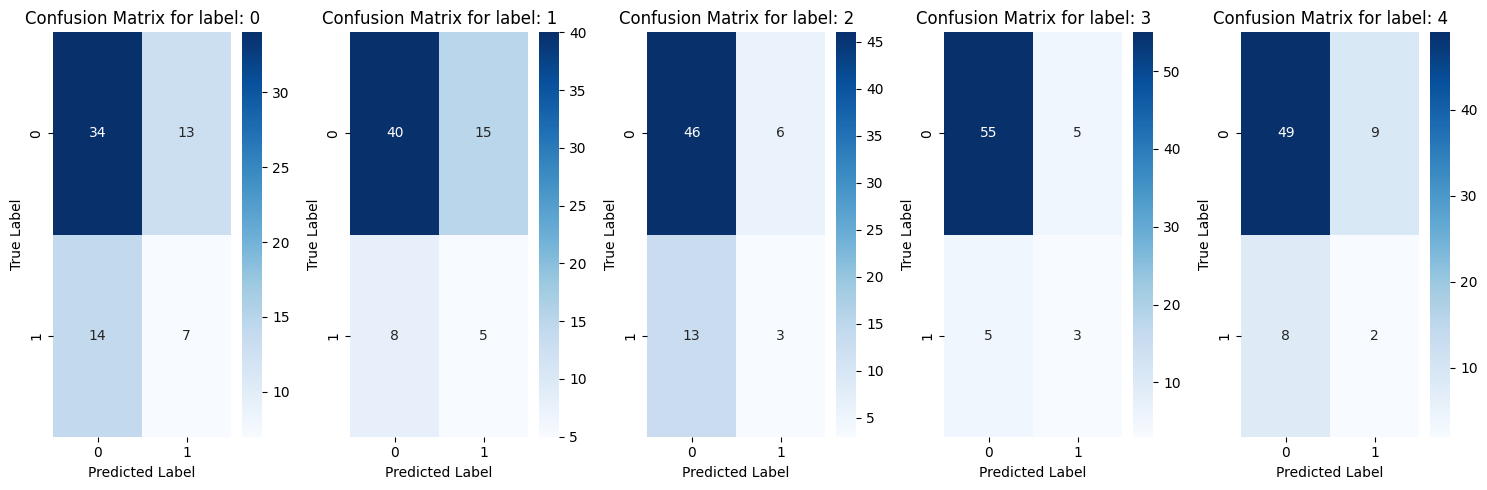

In [79]:
fig, axes = plt.subplots(1, len(test_res), figsize=(15, 5))
labels = ['0', '1']
# Loop over each confusion matrix and plot it
for i, cm in enumerate(test_res):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title(f'Confusion Matrix for label: {i}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()

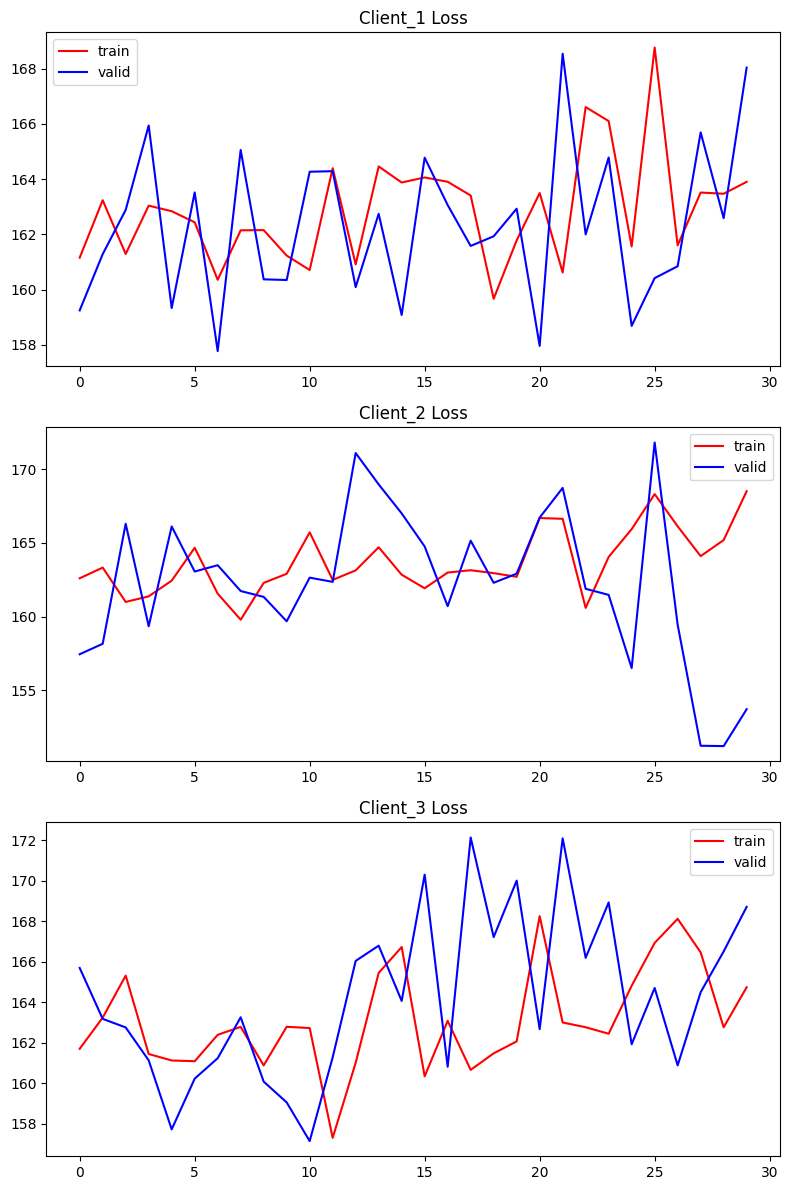

In [56]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have imported the necessary modules and defined num_clients and train_res

# Loss plots
fig, axes = plt.subplots(num_clients, 1, figsize=(8, 4*num_clients))

for i in range(num_clients):
    # Assuming train_res contains lists of tensors
    epochs = range(0, len(train_res[0][f'client_{str(i+ 1)}']))

    # Flatten the lists if necessary
    loss_values = list(itertools.chain(*train_res[0][f'client_{str(i+ 1)}']))
    new_loss_values= torch.tensor(loss_values, device = 'cpu')

    val_loss_values = list(itertools.chain(*train_res[3][f'client_{str(i+ 1)}']))
    new_val_loss_values= torch.tensor(val_loss_values, device = 'cpu')


    axes[i].plot(range(0, len(loss_values)), new_loss_values, label='train', color='red')
    axes[i].plot(range(0, len(loss_values)), new_val_loss_values, label='valid', color='blue')
    axes[i].set_title(f'Client_{str(i + 1)} Loss')
    axes[i].legend()

plt.tight_layout()
# Show the plots
plt.show()


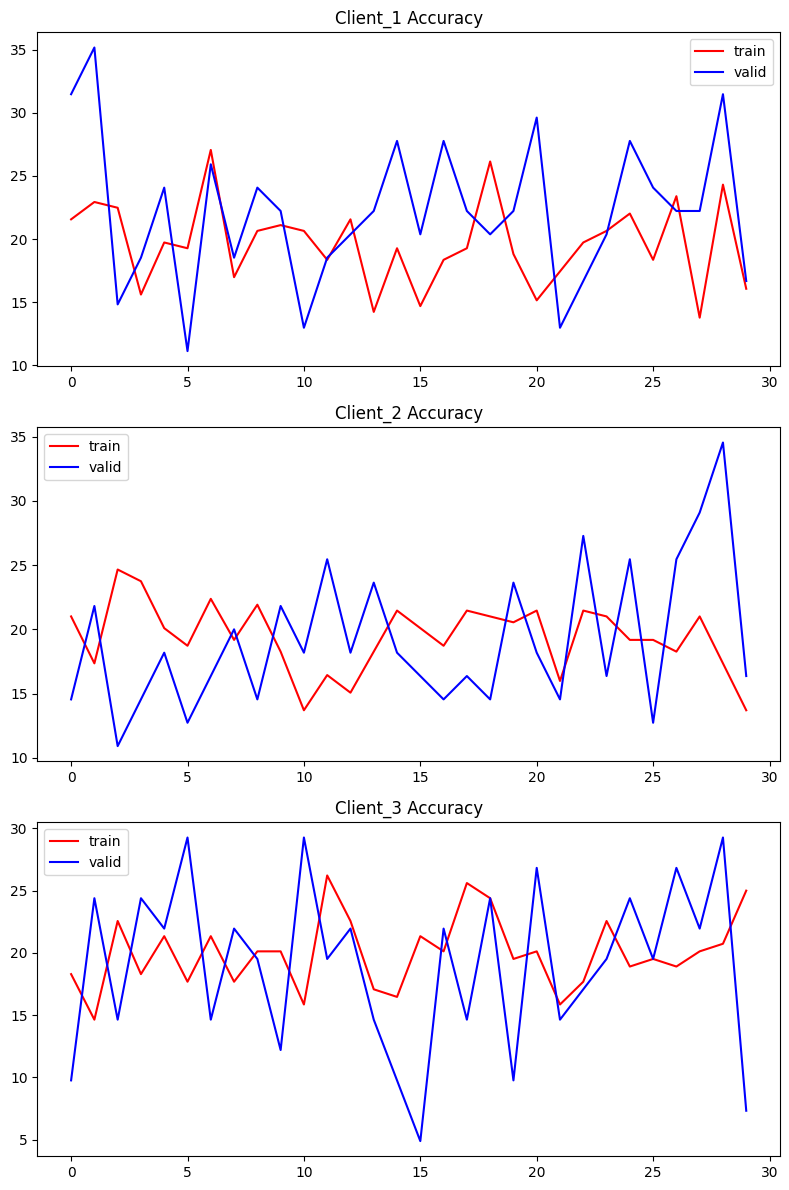

In [57]:
import itertools
#accuracy plot
fig, axes = plt.subplots(num_clients, 1, figsize=(8, 4*num_clients))  # Adjust figsize based on your preference

epochs = range(0, len(train_res[0]['client_1']))
for i in range(num_clients):

    acc_values = list(itertools.chain(*train_res[1][f'client_{str(i + 1)}']))
    new_acc_values= torch.tensor(acc_values, device = 'cpu')

    val_acc_values = list(itertools.chain(*train_res[4][f'client_{str(i + 1)}']))
    new_val_acc_values= torch.tensor(val_acc_values, device = 'cpu')

    axes[i].plot(range(0, len(val_acc_values)),new_acc_values, label='train', color='red')
    axes[i].plot(range(0, len(val_acc_values)),new_val_acc_values, label='valid', color='blue')
    axes[i].set_title(f'Client_{str(i + 1)} Accuracy')
    axes[i].legend()

plt.tight_layout()
# Show the plots
plt.show()

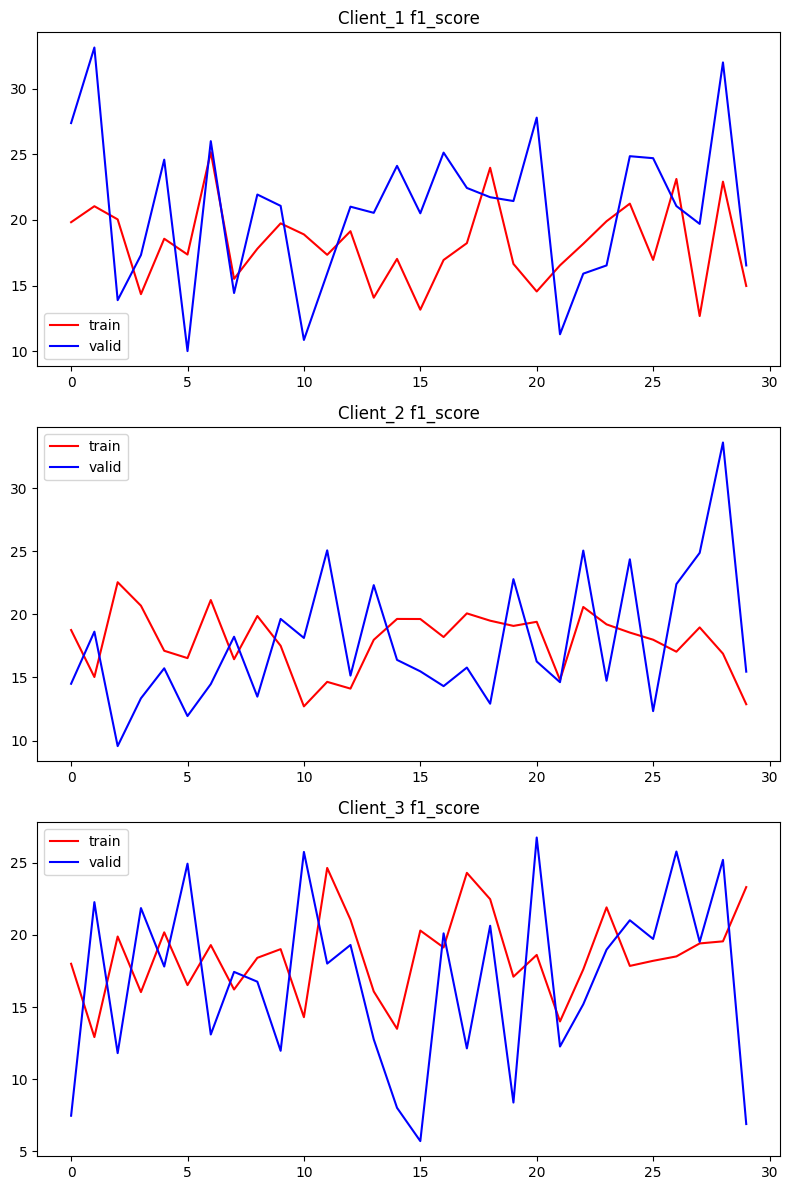

In [58]:
import itertools
#f1_score plot
fig, axes = plt.subplots(num_clients, 1, figsize=(8, 4*num_clients))  # Adjust figsize based on your preference

epochs = range(0, len(train_res[0]['client_1']))
for i in range(num_clients):

    f1_values = list(itertools.chain(*train_res[2][f'client_{str(i + 1)}']))
    new_f1_values= torch.tensor(f1_values, device = 'cpu')

    val_f1_values = list(itertools.chain(*train_res[5][f'client_{str(i + 1)}']))
    new_val_f1_values= torch.tensor(val_f1_values, device = 'cpu')

    axes[i].plot(range(0, len(val_f1_values)),new_f1_values, label='train', color='red')
    axes[i].plot(range(0, len(val_f1_values)),new_val_f1_values , label='valid', color='blue')
    axes[i].set_title(f'Client_{str(i + 1)} f1_score')
    axes[i].legend()

plt.tight_layout()
# Show the plots
plt.show()

In [ ]:
1